# Telco Project
## Author: Shuo Xu

#### Import Packages

In [282]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Import Data

In [283]:
df = pd.read_excel("Telco.xlsx")

In [284]:
print("This dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

This dataset has 7043 rows and 33 columns.


#### Feature 'Total Charges' has the wrong data type. The correct data type should be float.
#### Other than Churn Reason, this data set does not have missing values.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### The Total Charges columns contain some empty values that can not be converted to float data types. We drop observations containing those empty values.

In [286]:
exception_list = []
for i in range(len(df['Total Charges'])):
    try:
        n = float(df['Total Charges'][i])
    except:
        print("An exception occurred at {}".format(i))
        exception_list.append(i)

An exception occurred at 2234
An exception occurred at 2438
An exception occurred at 2568
An exception occurred at 2667
An exception occurred at 2856
An exception occurred at 4331
An exception occurred at 4687
An exception occurred at 5104
An exception occurred at 5719
An exception occurred at 6772
An exception occurred at 6840


In [287]:
exception_df = df.iloc[exception_list]
exception_df['Total Charges']

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

In [288]:
df = df.drop(index=exception_list)

In [310]:
df['Total Charges'] = df['Total Charges'].astype(float)

#### Explore the data

In [289]:
print("All observations are within {}.".format(df.Country.unique()))

All observations are within ['United States'].


In [290]:
print("All observations are within {}.".format(df.State.unique()))

All observations are within ['California'].


In [291]:
Total_Churn_Rate = round(df['Churn Value'].value_counts()[1]/(df['Churn Value'].value_counts()[0]+df['Churn Value'].value_counts()[1])*100,2)
print("{} percent of observations churn from the company.".format(Total_Churn_Rate))
print("We have an inbalanced dataset.")

26.58 percent of observations churn from the company.
We have an inbalanced dataset.


### Reminder: 'Churn' means a customer left the company in "THIS" quarter. The customer can come back in the future.

#### Let's look at how the churn rates are differed by each feature.

In [292]:
def Churn_Rate_By_Sector(sector):
    sector_dictionary = {}
    sector_list = [x for x in df[sector].unique()]
    for s in sector_list:
        value_counts = df[df[sector]==s]['Churn Value'].value_counts()
        if len(value_counts)==2:
            if value_counts.index[0]==1:
                churn = value_counts[0]
                not_churn = value_counts[1]
                rate = round(churn/(churn+not_churn),2)
            else:
                churn = value_counts[1]
                not_churn = value_counts[0]
                rate = round(churn/(churn+not_churn),2)
        else:
            if value_counts.index[0]==0:
                rate = 0
            else:
                rate = 1
        sector_dictionary[s] = rate
    return sector_dictionary

#### Female customers have slightly higher churn rates.

<BarContainer object of 2 artists>

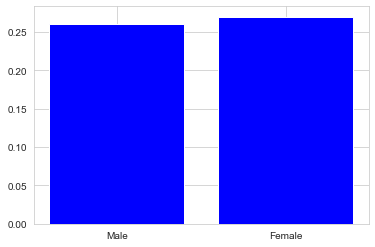

In [293]:
myDictionary = Churn_Rate_By_Sector('Gender')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Senior customers have higher churn rates.

<BarContainer object of 2 artists>

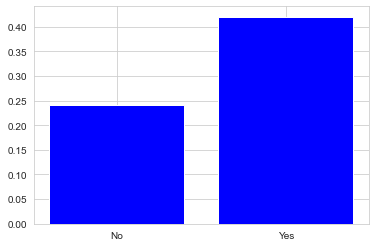

In [294]:
myDictionary = Churn_Rate_By_Sector('Senior Citizen')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who are single have higher churn rates.

<BarContainer object of 2 artists>

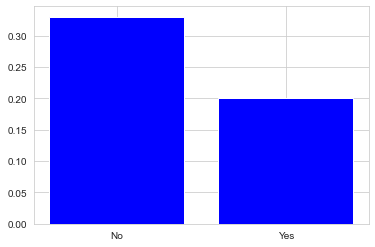

In [295]:
myDictionary = Churn_Rate_By_Sector('Partner')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not have dependent have higher churn rates.

<BarContainer object of 2 artists>

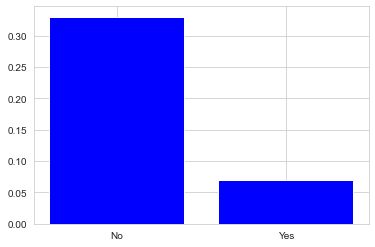

In [296]:
myDictionary = Churn_Rate_By_Sector('Dependents')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers with a Month-to-month contract have higher churn rates

<BarContainer object of 3 artists>

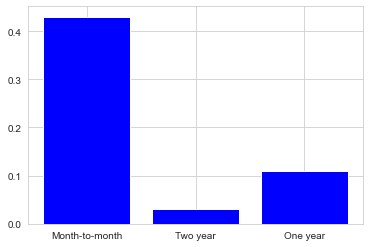

In [297]:
myDictionary = Churn_Rate_By_Sector('Contract')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers with shorter Tenure Months have higher churn rates.

<BarContainer object of 72 artists>

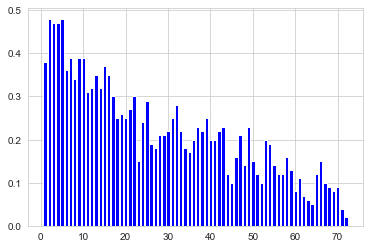

In [298]:
myDictionary = Churn_Rate_By_Sector('Tenure Months')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who subscribe phone service have higher churn rates.

<BarContainer object of 2 artists>

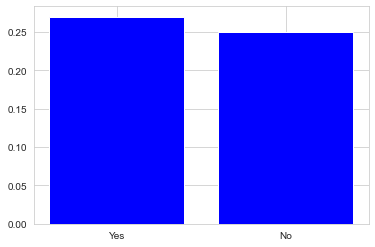

In [299]:
myDictionary = Churn_Rate_By_Sector('Phone Service')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who subscribe multiple phone services have higher churn rates. This explain the driving force of the above graph.

<BarContainer object of 3 artists>

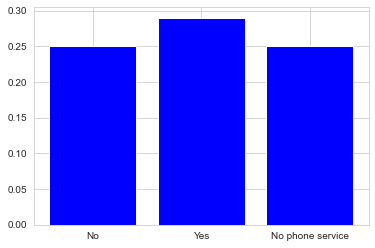

In [300]:
myDictionary = Churn_Rate_By_Sector('Multiple Lines')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who subscribe Fiber Optic Internet Service have higher churn rates.

<BarContainer object of 3 artists>

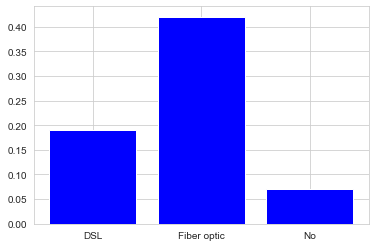

In [301]:
myDictionary = Churn_Rate_By_Sector('Internet Service')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Among customers who subscribe internet services, customer who do not subscribe to online security have higher churn rates.

<BarContainer object of 3 artists>

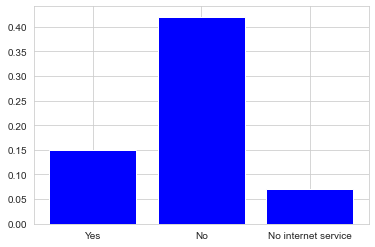

In [302]:
myDictionary = Churn_Rate_By_Sector('Online Security')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Among customers who subscribe internet services, customers who do not subscribe to online backup have higher churn rates.

<BarContainer object of 3 artists>

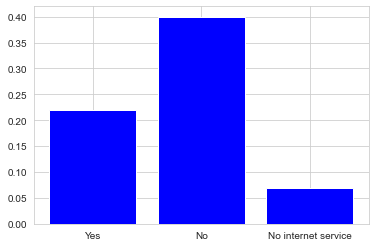

In [303]:
myDictionary = Churn_Rate_By_Sector('Online Backup')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not subscribe to additional device protection plan have higher churn rates.

<BarContainer object of 3 artists>

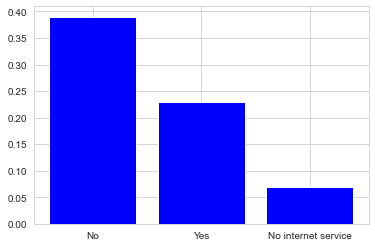

In [304]:
myDictionary = Churn_Rate_By_Sector('Device Protection')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not subscribe to tech support have higher churn rates.

<BarContainer object of 3 artists>

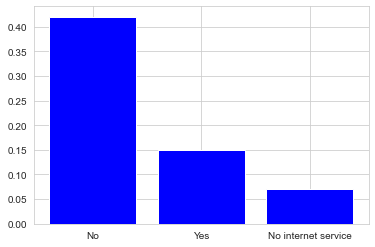

In [305]:
myDictionary = Churn_Rate_By_Sector('Tech Support')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not use internet to stream TV have higher churn rates.

<BarContainer object of 3 artists>

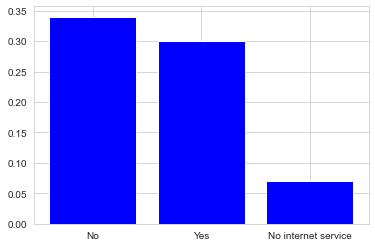

In [306]:
myDictionary = Churn_Rate_By_Sector('Streaming TV')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not use internet to stream Movies have higher churn rates.

<BarContainer object of 3 artists>

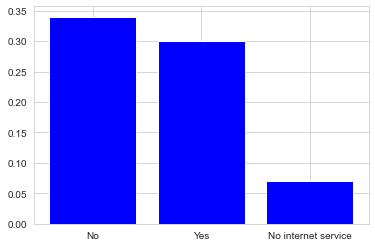

In [307]:
myDictionary = Churn_Rate_By_Sector('Streaming Movies')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who use paperless billing have higher churn rates.

<BarContainer object of 2 artists>

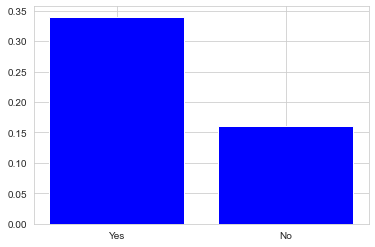

In [308]:
myDictionary = Churn_Rate_By_Sector('Paperless Billing')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who pay in electronic check have higher churn rates.

<BarContainer object of 4 artists>

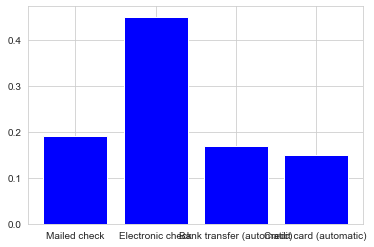

In [309]:
myDictionary = Churn_Rate_By_Sector('Payment Method')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

## Feature Selection

In [311]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [313]:
drop_features = ['CustomerID','Country','State','City','Lat Long','Churn Label','Churn Reason']
keep_features = [ele for ele in cat_features if ele not in drop_features]
keep_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [314]:
df1 = df.drop(columns=['CustomerID','Count','Country','State','Lat Long','Churn Label','Churn Reason','Churn Score','City','Zip Code'])
df1.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [315]:
df2 = pd.get_dummies (df1, columns= keep_features)
df2.head()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,2,53.85,108.15,1,3239,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,34.059281,-118.307420,2,70.70,151.65,1,2701,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,34.048013,-118.293953,8,99.65,820.50,1,5372,1,0,1,...,1,1,0,0,0,1,0,0,1,0
3,34.062125,-118.315709,28,104.80,3046.05,1,5003,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,34.039224,-118.266293,49,103.70,5036.30,1,5340,0,1,1,...,1,1,0,0,0,1,1,0,0,0


In [316]:
df2.corr()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Latitude,1.000000,-0.876777,-0.002100,-0.020302,-0.010313,-0.003600,0.000137,-0.009147,0.009147,0.010592,...,-0.003976,-0.004808,0.001078,0.004576,0.018159,-0.018159,0.002217,-0.007755,-0.002363,0.008084
Longitude,-0.876777,1.000000,-0.001477,0.024513,0.009047,0.004693,0.000953,0.010610,-0.010610,-0.008890,...,0.002657,0.008268,0.003833,-0.013288,-0.020974,0.020974,-0.006001,-0.000084,0.016034,-0.012053
Tenure Months,-0.002100,-0.001477,1.000000,0.246862,0.825880,-0.354049,0.396188,-0.005285,0.005285,-0.015683,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
Monthly Charges,-0.020302,0.024513,0.246862,1.000000,0.651065,0.192858,0.098565,0.013779,-0.013779,-0.219874,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
Total Charges,-0.010313,0.009047,0.825880,0.651065,1.000000,-0.199484,0.341837,-0.000048,0.000048,-0.102411,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn Value,-0.003600,0.004693,-0.354049,0.192858,-0.199484,1.000000,-0.128253,0.008545,-0.008545,-0.150541,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
CLTV,0.000137,0.000953,0.396188,0.098565,0.341837,-0.128253,1.000000,0.007473,-0.007473,0.003600,...,0.113019,-0.248070,0.055820,0.235861,-0.010488,0.010488,0.096499,0.078526,-0.071512,-0.091686
Gender_Female,-0.009147,0.010610,-0.005285,0.013779,-0.000048,0.008545,0.007473,1.000000,-1.000000,-0.001819,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
Gender_Male,0.009147,-0.010610,0.005285,-0.013779,0.000048,-0.008545,-0.007473,-1.000000,1.000000,0.001819,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Senior Citizen_No,0.010592,-0.008890,-0.015683,-0.219874,-0.102411,-0.150541,0.003600,-0.001819,0.001819,1.000000,...,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987


<AxesSubplot:>

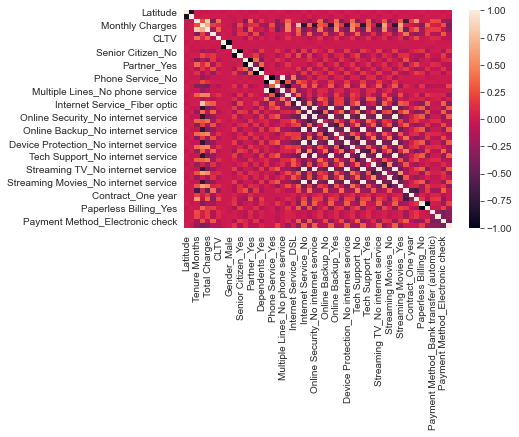

In [317]:
plt.figure()
sns.heatmap(df2.corr())

## Model

In [318]:
X = df2.drop(columns=['Churn Value'])
y = df2.iloc[:,5]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.25, random_state=440, shuffle = True, stratify=y)

In [319]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 614)
log_reg.fit(X_train,y_train.values.ravel())
y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

C:\Users\xu.2164\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [320]:
# Import evaluation packages
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [323]:
# Testing Confusion Matrix
print(confusion_matrix(y_test,y_test_predict))

[[1147  144]
 [ 205  262]]


In [324]:
# Testing performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.56      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758



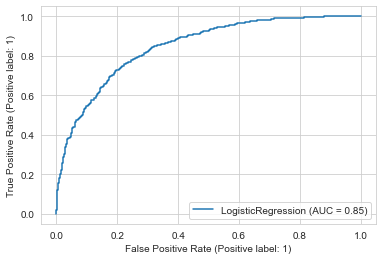

In [325]:
# ROC/AUC performance
metrics.plot_roc_curve(log_reg, X_test, y_test) 
plt.show()

In [326]:
# Random Forest with arbitrary hyperparameters
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=500,max_depth = 6)
forest_clf.fit(X_train,y_train.values.ravel())
y_train_predict = forest_clf.predict(X_train)
y_test_predict = forest_clf.predict(X_test)


In [327]:
# Out-of-sample confusion matrix
print(confusion_matrix(y_test,y_test_predict))

[[1188  103]
 [ 229  238]]


In [328]:
# Out-of-sample performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1291
           1       0.70      0.51      0.59       467

    accuracy                           0.81      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



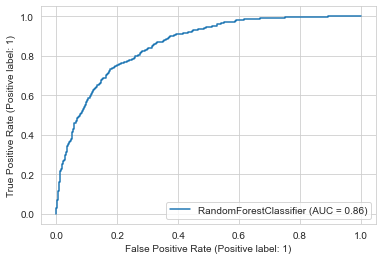

In [329]:
# ROC/AUC performance
metrics.plot_roc_curve(forest_clf, X_test, y_test) 
plt.show()

In [330]:
# Tuning the random forest by a random search model
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_grid = {
 'n_estimators': np.linspace(10, 200).astype(int),
 'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
 'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
 'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
 'min_samples_split': [2, 5, 10],
 'bootstrap': [True, False]
}
# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 614)
# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
 scoring = 'roc_auc', cv = 5,
 n_iter = 10, verbose = 1, random_state=614)
# Fit 
rs.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=614),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                    

In [331]:
# The best hyperparameters
rs.best_params_

{'n_estimators': 145,
 'min_samples_split': 10,
 'max_leaf_nodes': 23,
 'max_features': 'sqrt',
 'max_depth': 17,
 'bootstrap': False}

In [332]:
# Use the best model
best_model = rs.best_estimator_
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

In [333]:
# Out-of-sample confusion matrix
print(confusion_matrix(y_test,y_test_predict))

[[1188  103]
 [ 230  237]]


In [334]:
# Out-of-sample performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1291
           1       0.70      0.51      0.59       467

    accuracy                           0.81      1758
   macro avg       0.77      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



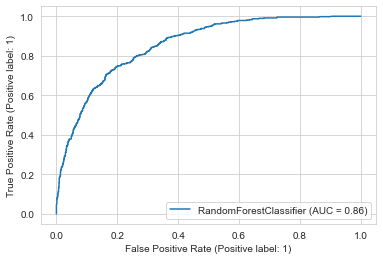

In [335]:
# ROC/AUC performance
metrics.plot_roc_curve(best_model, X_test, y_test) 
plt.show()

In [336]:
# Feature importance
fi = pd.DataFrame({'feature': list(X_train),
 'importance': best_model.feature_importances_}).\
 sort_values('importance', ascending = False)
fi.head(len(list(X_train)))

,feature,importance
40,Contract_Month-to-month,0.174930
31,Tech Support_No,0.106436
2,Tenure Months,0.100142
20,Internet Service_Fiber optic,0.089832
4,Total Charges,0.087270
47,Payment Method_Electronic check,0.052101
12,Dependents_No,0.050008
22,Online Security_No,0.047524
42,Contract_Two year,0.039958
13,Dependents_Yes,0.037410


In [338]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [339]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

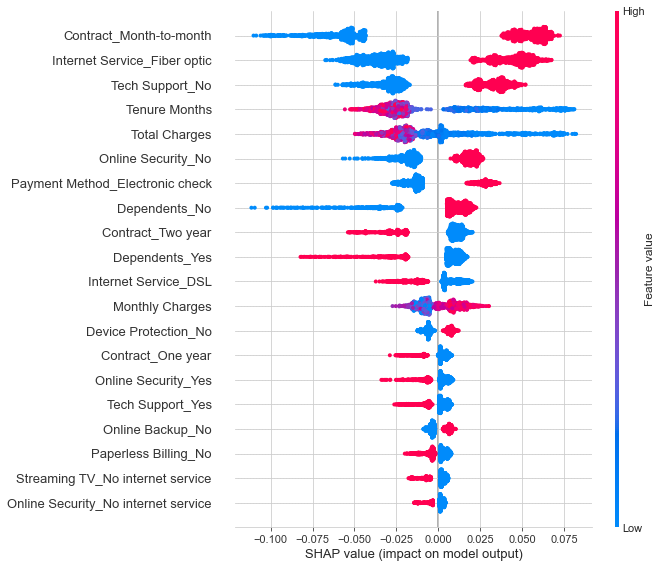

In [340]:
shap.summary_plot(shap_values[1], X_test)

In [342]:
pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=0f41a7b156bbe683a9a44946a66b1af6ddda4ccb2224d85809a767595c4ef6d1
  Stored in directory: c:\users\xu.2164\appdata\local\pip\cache\wheels\9e\37\2c\3b30269ca762b6bb992fd0abb640f3e384c290e719597fddbc
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [347]:
feature_list = [i for i in df2.columns]
feature_list = feature_list.remove('Churn Value')

In [348]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(best_model.estimators_[0], X_train, y_train,
                target_name="pa_approved", feature_names=feature_list)
viz

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\XUDD21~1.216\\AppData\\Local\\Temp\\1\\DTreeViz_11460.svg', 'C:/Users/XUDD21~1.216/AppData/Local/Temp/1\\DTreeViz_11460'], make sure the Graphviz executables are on your systems' PATH